# Predictive Analytics
- Alfin Muhammad Ilmi
- M299X0762
- M06

**Dataset :** *Vehicle* dataset, *accessed from* https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

## Import Libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import zipfile
import os
import opendatasets as od
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Data Loading

In [ ]:
od.download("https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alfinmuhammadilmi
Your Kaggle Key: ··········


100%|██████████| 227k/227k [00:00<00:00, 67.2MB/s]

### Ekstrak Data

In [ ]:
df = pd.read_csv('/content/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


*Output* di atas memberikan informasi sebagai berikut:
* Ada 4340 baris (*records*) dalam dataset.
* Terdapat 8 kolom yaitu `name`, `year`, `selling_price`, `km_driven`, `fuel`, `seller_type`, `transmission`, `owner`.

## Exploratory Data Analysis

### Deskripsi Variabel

Sesuai dengan informasi dari [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv), Variabel-variabel pada *Vehicle* Dataset adalah sebagai berikut:
* *name* adalah nama mobil.
* *year* adalah tahun mobil saat dibeli.
* *selling_price* adalah harga jual mobil tersebut.
* *km_driven* adalah Jumlah Kilometer mobil dikemudikan.
* *fuel* adalah jenis bahan bakar mobil. Adapun rincian jenis bahan bakar adalah sebagai berikut:
  * *Petrol* yang berarti bensin.
  * *Diesel* yang berarti solar.
  * *CNG (Compressed Natural Gas)* yang berarti gas alam terkompresi.
  * *LPG (Liquefied Petroleum Gas)* yang berarti gas minyak cair
  * *Electric* yang berarti listrik.
* *seller_type* untuk memberitahukan apakah penjual merupakan *Individual*	(perorangan) atau *Dealer*.
* *transmission* adalah transmisi gigi mobil (*Automatic/Manual*)
* *owner* adalah jumlah pemilik mobil sebelumnya.

Langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi info() berikut:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Dari output di atas terlihat bahwa:
* Terdapat 3 kolom numerik dengan tipe data int64, yaitu *year*, *selling_price*, dan *km_driven*.
* Terdapat 5 kolom dengan tipe object, yaitu: *name*, *fuel*, *seller_type*, *transmission*, dan *owner*. Kolom ini merupakan *categorical features* (fitur non-numerik).
* Fitur *selling_price* merupakan target fitur kita.

Dari uraian di atas menunjukkan bahwa setiap kolom memiliki tipe data yang sesuai. Selanjutnya kita perlu mengecek deskripsi statistik data dengan fitur describe().

#### Deskripsi Statistik Data

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
* *Count* adalah jumlah sample pada data.
* *Mean* adalah nilai rata-rata.
* *Std* adalah standar deviasi.
* *Min* yaitu nilai minimum setiap kolom.
* *25%* adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* *50%* adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* *75%* adalah kuartil ketiga.
* *Max* adalah nilai maksimum.

### Menangani Missing Value & Outliers

#### Menangani Missing Value

Cek jumlah missing value (NULL, NaN) pada semua kolom.

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Dari *output* di atas terlihat bahwa setiap fitur tidak memiliki nilai NULL maupun NAN sehingga kita dapat melanjutkan ke tahapan selanjutnya yaitu menangani *outliers*.

#### Menangani Outliers

Kita akan mendeteksi *outliers* dengan teknis visualisasi data (boxplot). Setelah itu kita akan menangani *outliers* dengan metode IQR.

Kita melakukan visualisasi pada fitur numerik.

##### 1. Fitur `year`

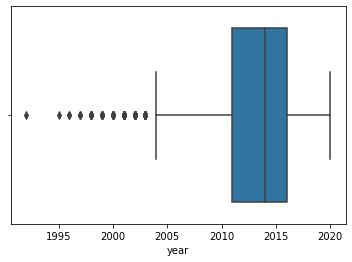

In [ ]:
sns.boxplot(x=df['year'])

##### 2. Fitur `selling_price` (Target)

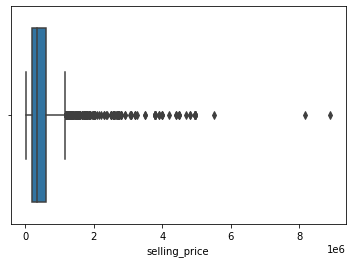

In [ ]:
sns.boxplot(x=df['selling_price'])

##### 3. Fitur `km_driven`

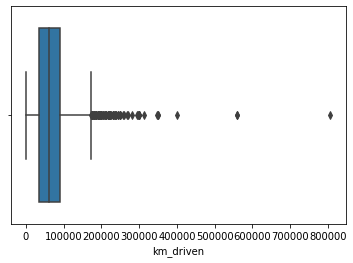

In [ ]:
sns.boxplot(x=df['km_driven'])

Jika kita perhatikan kembali, pada seluruh fitur numerik di atas terdapat *outliers*. Kita akan menggunakan metode IQR untuk mengidentifikasi *outlier* yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai *outlier*.
Hal pertama yang perlu kita lakukan adalah membuat batas bawah dan batas atas.

```
Batas bawah = Q1 - 1.5 * IQR
Batas atas = Q3 + 1.5 * IQR
```



Berikut penerapannya ke dalam kode.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f"Sebelum proses menghilangkan outlier, ukuran dataset adalah {df.shape}")

# Proses menghilangkan outlier
df = df[
    ~((df < batas_bawah) | (df > batas_atas)).any(axis=1)
]
 
# Cek ukuran dataset setelah kita drop outliers
print(f"Setelah proses menghilangkan outlier, ukuran dataset adalah {df.shape}")

Sebelum proses menghilangkan outlier, ukuran dataset adalah (4340, 8)
Setelah proses menghilangkan outlier, ukuran dataset adalah (3858, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


Banyak *outlier* yang dibersihkan sebanyak 4340 - 3858 = 482 baris. Kita cek kembali dengan boxplot setelah membersihkan *outlier*.

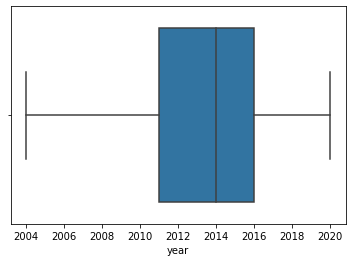

In [ ]:
sns.boxplot(x=df['year'])

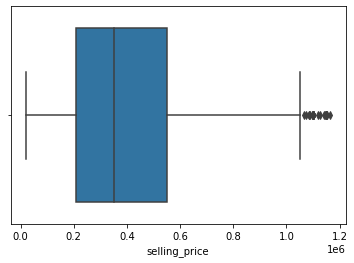

In [ ]:
sns.boxplot(x=df['selling_price'])

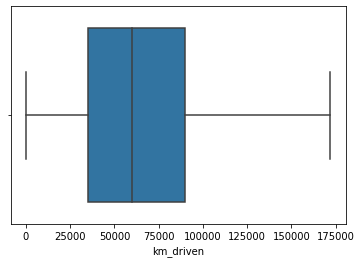

In [ ]:
sns.boxplot(x=df['km_driven'])

Dari hasil di atas, dapat dilihat bahwa *outlier* sudah berkurang setelah dibersihkan.

### Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, kita bagi fitur pada dataset menjadi dua bagian, yaitu *numerical features* dan *categorical features*.

In [ ]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['year', 'selling_price', 'km_driven']

Mari kita lakukan analisis terhadap fitur kategori terlebih dahulu.

#### Categorical Features

          jumlah_sampel  persentase
Petrol             1995        51.7
Diesel             1800        46.7
CNG                  40         1.0
LPG                  22         0.6
Electric              1         0.0


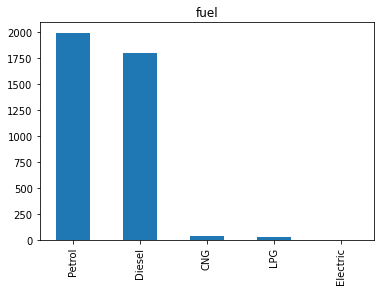

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_fuel = pd.DataFrame({'jumlah_sampel':count, 'persentase':percent.round(1)})
print(df_fuel)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur *fuel*, secara berurutan dari jumlahnya yang paling banyak yaitu: *Petrol*, *Diesel*, CNG, LPG, dan *Electric*. Dari data persentase dapat kita simpulkan bahwa lebih dari 50% sampel merupakan mobil dengan bahan bakar *petrol* atau bensin. Sedangkan mobil dengan bahan bakar *diesel* atau solar sebanyak 46% dari jumlah sampel.

                  jumlah_sampel  persentase
Individual                 2916        75.6
Dealer                      853        22.1
Trustmark Dealer             89         2.3


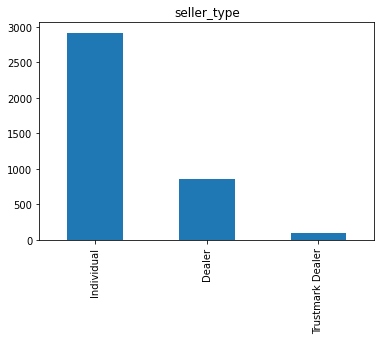

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_price = pd.DataFrame({'jumlah_sampel':count, 'persentase':percent.round(1)})
print(df_price)
count.plot(kind='bar', title=feature);

Berdasarkan visualisasi di atas, dapat diketahui bahwa 75% lebih penjual merupakan *Individual* (perorangan) dan kurang dari 25% penjual berasal dari *Dealer* dan *Trustmark Dealer*.

           jumlah_sampel  persentase
Manual              3609        93.5
Automatic            249         6.5


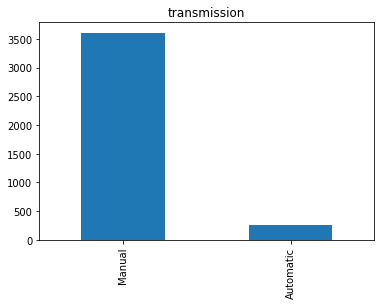

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_transmission = pd.DataFrame({'jumlah_sampel':count, 'persentase':percent.round(1)})
print(df_transmission)
count.plot(kind='bar', title=feature);

Berdasarkan grafik di atas, dapat disimpulkan bahwa sebagian besar mobil yang dijual menggunakan transmisi manual. 

                      jumlah_sampel  persentase
First Owner                    2526        65.5
Second Owner                   1011        26.2
Third Owner                     247         6.4
Fourth & Above Owner             60         1.6
Test Drive Car                   14         0.4


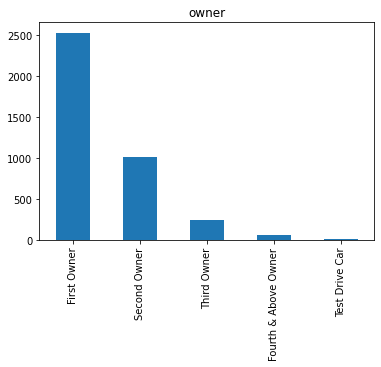

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_owner = pd.DataFrame({'jumlah_sampel':count, 'persentase':percent.round(1)})
print(df_owner)
count.plot(kind='bar', title=feature);

Berdasarka grafik di atas, dapat diketahui bahwa 65,5% sampel merupakan mobil yang dijual oleh pemilik pertama dan 26% sampel merupakan mobil yang dijual oleh pemilik kedua. Sisanya merupakan mobil yang dijual oleh pemilik ketiga atau lebih dan mobil uji coba (*Test Drive Car*).

#### Numerical Features

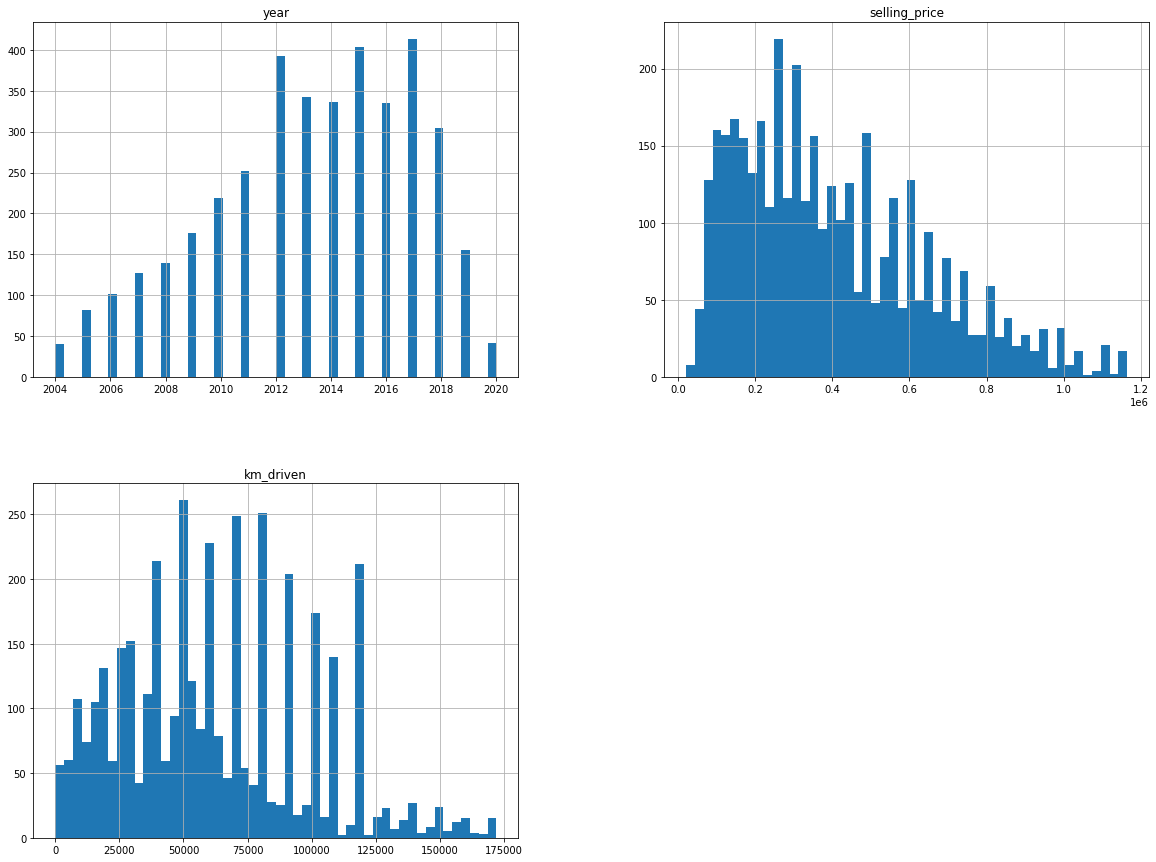

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil visualisasi di atas, kita bisa memperoleh beberapa informasi, antara lain:
* Distribusi fitur *year* cenderung miring ke kiri (*left-skewed*).
* Distribusi fitur *selling_price* (target) cenderung miring ke kanan (*right-skewed*).

Karena beberapa fitur belum terdistribusi normal hal ini akan berimplikasi pada model. Selanjutnya kita akan melakukan transformasi data (*non-linear scaling*). Namun, sebelum itu kita cek terlebih dahulu hubungan antara fitur numerik tersebut.

### Multivariate Analysis

#### Categorical Features

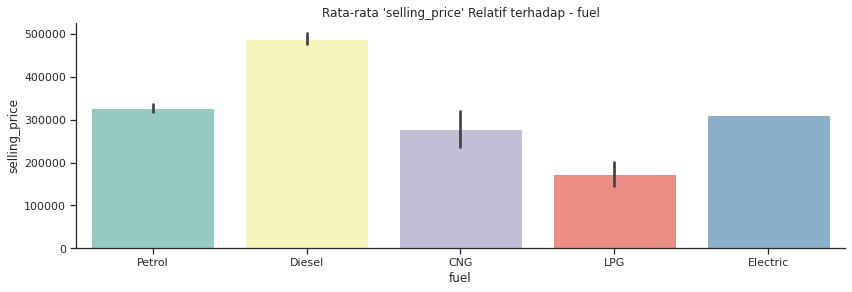

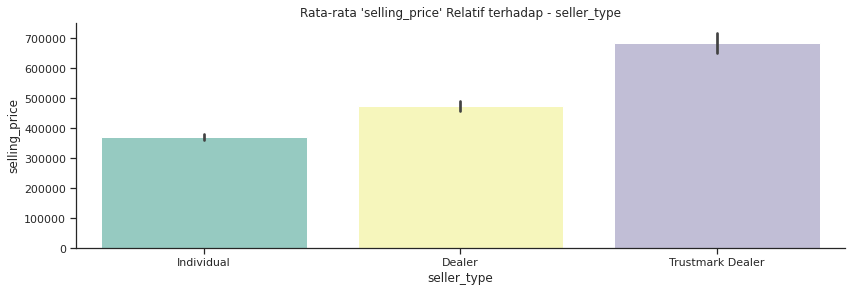

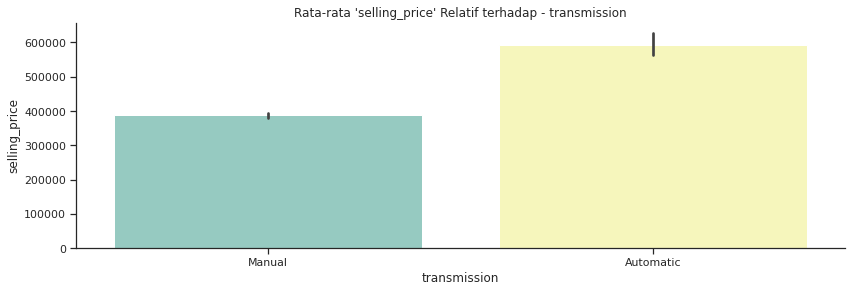

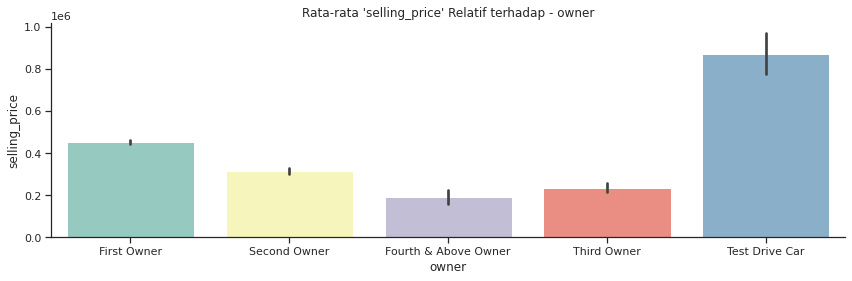

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  if col == 'name' :
    continue
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'selling_price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh *insight* sebagai berikut:

* Pada fitur `fuel` terlihat bahwa mobil dengan bahan bakar *diesel* memiliki rata-rata harga yang lebih tinggi dibandingkan dengan bahan bakar lainnya.
* Pada fitur `seller_type` dapat diketahui bahwa mobil yang dijual melalui *trustmark dealer* memiliki rata-rata harga lebih tinggi di atas dealer biasa dan penjualan individu
* Pada fitur `transmission` terlihat bahwa harga mobil dengan transmisi *automatic* memiliki rata-rata harga yang lebih tinggi dibandingkan dengan transmisi *manual*.
* Pada fitur `owner` dapat diketahui bahwa *test drive car* memiliki rata-rata harga paling tinggi. Mobil dari pemilik pertama memiliki rata-rata harga tertinggi kedua. Mobil dari pemilik kedua memiliki rata-rata harga tertinggi ketiga. Mobil dari pemilik ketiga memiliki rata-rata harga tertinggi keempat. Dan mobil dari pemilik keempat atau lebih bawah memiliki rata-rata harga paling rendah. Hal ini berarti bahwa fitur `owner` memiliki pengaruh yang cukup tinggi terhadap harga.

Kesimpulan akhir, fitur kategori memiliki pengaruh yang cukup tinggi terhadap harga.


#### Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot().

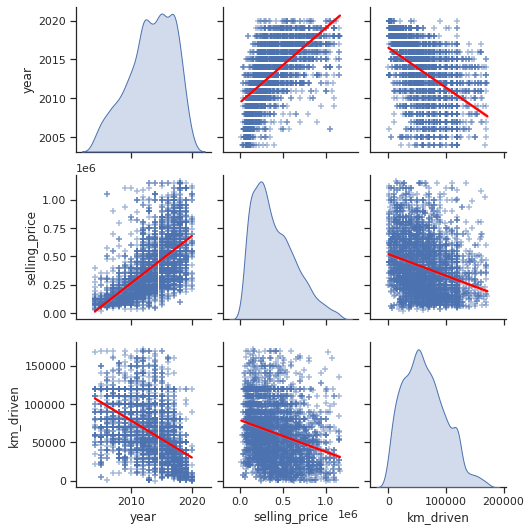

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Pada pola sebaran data grafik pairplot di atas, terlihat fitur `year` memiliki korelasi positif kuat dengan fitur `selling_price` (target). Sedangkan fitur lainnya yaitu `km_driven` memiliki korelasi negatif yang lemah dengan fitur `selling_price`. Selanjutnya kita akan mengevaluasi skor korelasi menggunakan fungsi corr() sebagai berikut

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

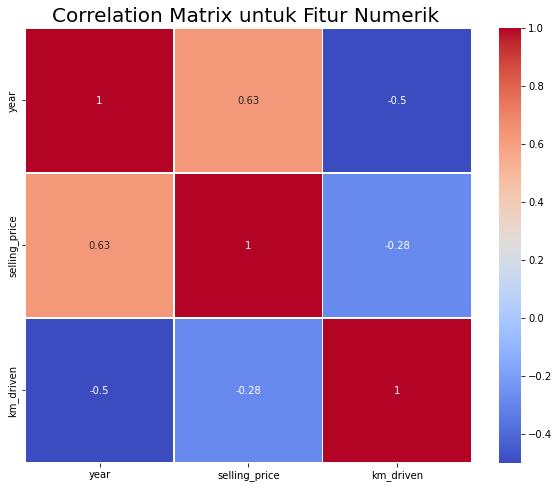

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.

Jika kita amati, fitur `year` memiliki skor korelasi yang cukup besar (di atas 0.6) dengan fitur target `selling_price`. Sementara itu, fitur `km_driven` memiliki korelasi yang kecil (0.28) dengan fitur `selling_price`. Tapi, fitur `km_driven` memiliki skor korelasi yang cukup besar dengan fitur `year` sehingga kita akan mereduksi kedua fitur tersebut.

## Data Preparation

### Encoding Fitur Kategori

Kita memiliki tiga variabel kategori dalam dataset kita, yaitu `fuel`, `seller_type`, `transmission`, dan `owner`. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['fuel'], prefix='fuel')],axis=1)
df = pd.concat([df, pd.get_dummies(df['seller_type'], prefix='seller_type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['owner'], prefix='owner')],axis=1)
df.drop(['fuel','seller_type','transmission','owner'], axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


Sekarang variabel kategori telah berubah menjadi variabel numerik.

### Reduksi Dimensi dengan PCA

PCA umumnya digunakan ketika variabel dalam data yang memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang. Kita cek menggunakan pairplot.

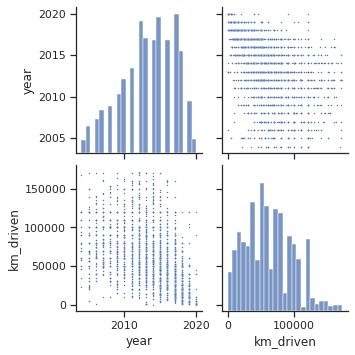

In [ ]:
sns.pairplot(df[['year','km_driven']], plot_kws={"s": 2});

Fitur `year` dan `km_driven` memiliki korelasi yang lumayan kuat.

Selanjutnya kita akan mereduksi `year` dan `km_driven` karena keduanya berkorelasi cukup kuat.

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=2, random_state=123)
pca.fit(df[['year','km_driven']])
princ_comp = pca.transform(df[['year','km_driven']])

Setelah menerapkan class PCA dengan n_components sebanyak fitur yang dikenakan PCA, kita bisa mengetahui proporsi informasi dari kedua komponen hasil PCA sebagai berikut:

In [ ]:
pca.explained_variance_ratio_.round(3)

array([1., 0.])

Arti dari *output* di atas adalah, 100% informasi pada kedua fitur `year` dan `km_driven` terdapat pada PC (*Principal Component*) pertama. Sedangkan hanya 0% yang terdapat pada PC kedua.

Berdasarkan hasil tersebut, kita akan mereduksi fitur dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur yang menggantikan dua fitur lainnya (`year` dan `km_driven`). Kita beri nama fitur ini `year_km_pca` (*year & km_driven* PCA).

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['year','km_driven']])
df['year_km_pca'] = pca.transform(df.loc[:, ('year','km_driven')]).flatten()
df.drop(['year','km_driven'], axis=1, inplace=True)

In [ ]:
df.head()

,name,selling_price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_km_pca
0,Maruti 800 AC,60000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,7330.647798
1,Maruti Wagon R LXI Minor,135000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,-12669.352175
2,Hyundai Verna 1.6 SX,600000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,37330.647503
3,Datsun RediGO T Option,250000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,-16669.352683
4,Honda Amaze VX i-DTEC,450000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,78330.647346


### Train-Test-Split

Membagi dataset menjadi data latih (*train*) dan data uji (*test*) merupakan hal yang harus kita lakukan sebelum membuat model. Tujuan langkah ini adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih.

Pada kasus ini kita akan menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["name"],axis =1)
y = df["selling_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3858
Total # of sample in train dataset: 3086
Total # of sample in test dataset: 772


### Standarisasi 

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Kita akan menggunakan teknik StandarScaler dari *library* Scikitlearn. 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan *mean* (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan *mean* sama dengan 0.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['year_km_pca']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year_km_pca
2309,-1.203933
3708,-0.626835
2408,0.527361
1888,0.197591
883,0.472399


Mari kita cek nilai *mean* dan standar deviasi pada setelah proses standarisasi.

In [ ]:
X_train[numerical_features].describe().round(4)

,year_km_pca
count,3086.0000
mean,-0.0000
std,1.0002
min,-1.7260
25%,-0.7642
50%,-0.0772
75%,0.7472
max,3.0006


ekarang nilai mean = 0 dan standar deviasi = 1.

## Model Development

Pada tahap ini, kita akan mengembangkan model *machine learning* dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma tersebut, antara lain:
1. K-Nearest Neighbor

  KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan kesamaan fitur untuk memprediksi nilai dari setiap data yang baru.
2. Random Forest
  
  Kelebihannya yaitu dapat mengatasi noise dan missing value serta dapat mengatasi data dalam jumlah yang besar. Dan kekurangannya yaitu interpretasi yang sulit dan membutuhkan tuning model yang tepat untuk data.
3. Boosting Algorithm

  Kelebihan algoritma Boosting adalah menggunakan teknik Boosting yang berusaha menurunkan bias dengan berjalan secara sekuensial (memperbaiki model di tiap tahapnya). 

Mari siapkan data frame untuk analisis ketiga model tersebut lebih dahulu.

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat. Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfitting dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k yang terlalu tinggi, maka model yang dihasilkan akan underfitting dan prediksinya memiliki bias yang tinggi

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

Algoritma Random Forest adalah salah satu algoritma *supervised learning*. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni. Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori *ensemble* (group) learning.

Kita akan menggunakan `RandomForestRegressor` dari library scikit-learn. Kita juga mengimpor mean_squared_error sebagai metrik untuk mengevaluasi performa model. Selanjutnya, kita membuat variabel RF dan memanggil RandomForestRegressor dengan beberapa nilai parameter. Berikut adalah parameter-parameter yang digunakan:
- n_estimator: jumlah *trees* (pohon) di *forest*. Di sini kita set n_estimator=50.
- max_depth:  kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (*splitting*) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- random_state: digunakan untuk mengontrol random *number generator* yang digunakan.
- n_jobs: jumlah *job* (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol *thread* atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

Teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. Kita akan menggunakan metode adaptive boosting. Salah satu metode adaptive boosting yang terkenal adalah AdaBoost.

Parameter-parameter (*hyperparameter*) yang digunakan pada algoritma ini antara lain:
* learning_rate: bobot yang diterapkan pada setiap *regressor* di masing-masing iterasi Boosting.
* random_state: digunakan untuk mengontrol *random number generator* yang digunakan.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau *Mean Squared Error* yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

#### Proses Scaling

Namun, sebelum menghitung nilai MSE dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji. Setelah model selesai dilatih dengan 3 algoritma, kita perlu melakukan proses scaling terhadap data uji. Hal ini harus dilakukan agar skala antara data latih dan data uji sama dan kita bisa melakukan evaluasi.

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#### Evaluasi ketiga model

Selanjutnya, mari kita evaluasi ketiga model kita dengan metrik MSE yang telah dijelaskan di atas.

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,805.396255,1421.824348
RF,64.808421,658.435559
Boosting,878475.437591,941031.825367


Saat menghitung nilai Mean Squared Error pada data train dan test, kita membaginya dengan nilai 1e3. Hal ini bertujuan agar nilai mse berada dalam skala yang tidak terlalu besar.

#### Plot Metrik dengan Bar Chart

Untuk memudahkan, mari kita plot hasil evaluasi model dengan bar chart.

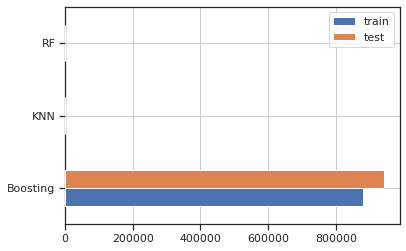

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test. Hasilnya akan muncul seperti yang berada di bawah.

In [ ]:
prediksi = X_test.iloc[:3].copy()
pred_dict = {'y_true':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1154,245000,245000.0,245000.0,219532.6
1218,190000,190000.0,190000.0,218429.8
1642,160000,160000.0,160000.0,113833.4


## Kesimpulan

Berdasarkan hasil evaluasi model di atas, dapat kita simpulkan bahwa model terbaik untuk melakukan prediksi harga mobil adalah model Random Forest. Dengan pengaturan parameter 'n_estimators': 50, 'max_depth': 16 diperoleh nilai metrik MSE sebesar 64.808 (pada data latih) dan 658.435 (pada data uji).

## Data Author
* Alfin Muhammad Ilmi